In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [4]:
motor_df = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv')

/home/dexter/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
motor_df.head(2)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,15:11,NaN,NaN,NaN,NaN,NaN,MONROE STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3559084,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,09/25/2016,17:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46 STREET,...,Unspecified,NaN,NaN,NaN,3527641,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [5]:
Dat = pd.to_datetime(motor_df.DATE)

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=-74.25453159999999,40.498948799999994,-73.70059680000001,40.9128688&bboxSR=4269&imageSR=4269&size=3000,2241&dpi=96&format=png32&f=image


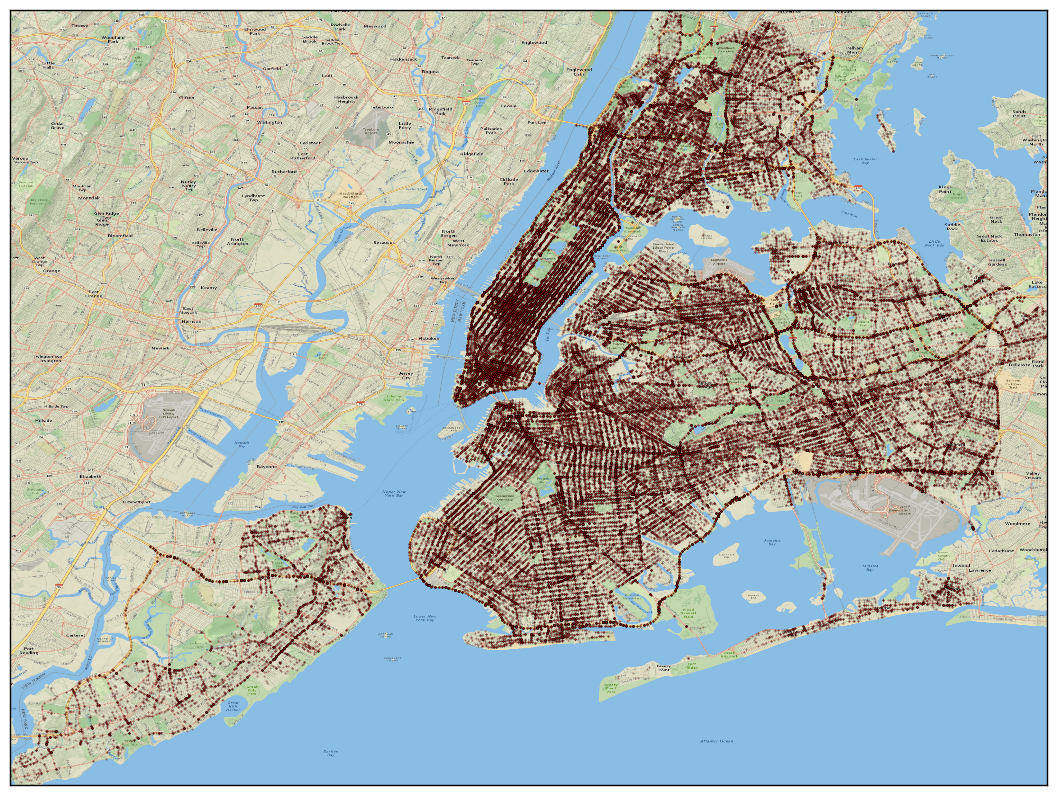

In [6]:
m = Basemap(projection='mill', llcrnrlat=motor_df.LATITUDE.min(), urcrnrlat=motor_df.LATITUDE.max(), 
            llcrnrlon=motor_df.LONGITUDE.min(), urcrnrlon=motor_df.LONGITUDE.max(), resolution='c', epsg=4269)
x, y = m(list(motor_df.LONGITUDE[(motor_df.LONGITUDE.isnull()==False) & (Dat.dt.year == 2016)]), list(motor_df.LATITUDE[(motor_df.LATITUDE.isnull() == False) & (Dat.dt.year == 2016)]))

plt.figure(figsize=(20,10))
m.arcgisimage(service="NatGeo_World_Map", xpixels=3000, verbose=True)
m.plot(x,y,'ro',markersize=1, alpha=.3 )